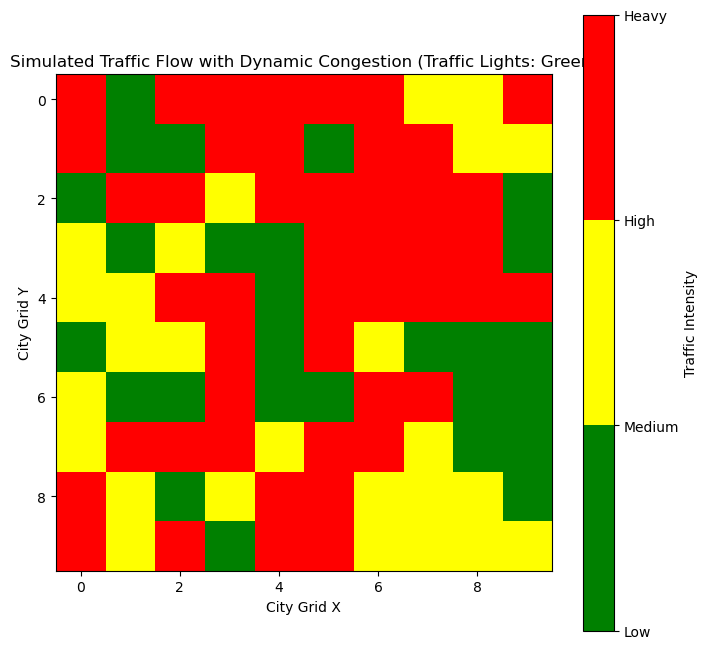

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.colors as mcolors
from IPython.display import HTML

# Setting up the city grid dimensions
grid_size = 10  # A 10x10 grid
max_traffic = 100  # Maximum traffic intensity value
frames = 100  # Number of frames to simulate

# Create an empty city grid with random traffic values
def generate_traffic_grid():
    return np.random.randint(0, max_traffic, size=(grid_size, grid_size))

# Function to simulate dynamic traffic sources, congestion, and traffic lights
def update_traffic(frame_num, img, city_grid):
    # Simulate traffic flow by shifting grid values
    city_grid = np.roll(city_grid, shift=1, axis=0)  # Shift rows down (simulate flow)
    city_grid = np.roll(city_grid, shift=1, axis=1)  # Shift columns to the right (simulate flow)
    
    # Introduce new traffic at random positions along the borders
    city_grid[0, :] = np.random.randint(0, max_traffic, size=grid_size)  # New traffic at top row
    city_grid[:, 0] = np.random.randint(0, max_traffic, size=grid_size)  # New traffic at left column
    
    # Simulate traffic jams by randomly increasing traffic in certain areas
    x_start, y_start = np.random.randint(1, grid_size-3), np.random.randint(1, grid_size-3)
    city_grid[x_start:x_start+3, y_start:y_start+3] = max_traffic  # Introduce congestion
    
    # Determine the state of traffic lights (Green for first half of frames, Red for the second)
    traffic_lights = 'Green' if frame_num % 20 < 10 else 'Red'

    # Update the image
    img.set_data(city_grid)
    ax.set_title(f"Simulated Traffic Flow with Dynamic Congestion (Traffic Lights: {traffic_lights})")
    return img,

# Create an initial city grid
city_grid = generate_traffic_grid()

# Set up the figure and axis for the plot
fig, ax = plt.subplots(figsize=(8, 8))
cmap = mcolors.ListedColormap(['green', 'yellow', 'red'])
bounds = [0, 33, 66, 100]  # Traffic intensity thresholds
norm = mcolors.BoundaryNorm(bounds, cmap.N)

img = ax.imshow(city_grid, cmap=cmap, norm=norm, interpolation='none')
ax.set_title("Simulated Traffic Flow with Dynamic Congestion")
ax.set_xlabel("City Grid X")
ax.set_ylabel("City Grid Y")

# Add a color bar to indicate traffic intensity
cbar = fig.colorbar(img, ax=ax, ticks=[0, 33, 66, 100])
cbar.set_label('Traffic Intensity')
cbar.set_ticks([0, 33, 66, 100])
cbar.ax.set_yticklabels(['Low', 'Medium', 'High', 'Heavy'])

# Create the animation
ani = FuncAnimation(fig, update_traffic, frames=frames, fargs=(img, city_grid), interval=100, repeat=False)

# Display the animation using HTML for Jupyter
HTML(ani.to_jshtml())  # Use this to display the animation
